In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [2]:
dir = os.getcwd()
rates = pd.read_csv(dir+'/data/rates.csv')

In [3]:
rates.columns

Index(['통계표', '계정항목', '단위', '변환', '2003/01', '2003/02', '2003/03', '2003/04',
       '2003/05', '2003/06',
       ...
       '2024/10', '2024/11', '2024/12', '2025/01', '2025/02', '2025/03',
       '2025/04', '2025/05', '2025/06', '2025/07'],
      dtype='object', length=275)

In [4]:
rates['계정항목']

0      CD(91일)
1      국고채(3년)
2     국고채(10년)
3    통안증권(91일)
Name: 계정항목, dtype: object

In [5]:
drops = ['통계표', '계정항목', '단위', '변환']
cols = ['cd91', '3y', '10y', '91']
rates.drop(columns=drops, inplace=True)

In [6]:
rates = rates.T

In [7]:
rates.columns = cols

In [8]:
rates = rates[['cd91', '3y', '10y']] # cd91금리, 3년물 금리, 10년물 금리

In [9]:
rates.head()

,cd91,3y,10y
2003/01,4.70,4.96,5.43
2003/02,4.54,4.73,5.15
2003/03,4.76,4.78,5.20
2003/04,4.62,4.60,5.03
2003/05,4.39,4.27,4.68


In [10]:
rates['10-3'] = rates['10y'] - rates['3y'] #10년-3년 금리차
rates['3-91d'] = rates['3y'] - rates['cd91'] # 3년-91일 금리차
rates['10-91d'] = rates['10y'] - rates['cd91'] #10년-91일 금리차

In [11]:
rates

,cd91,3y,10y,10-3,3-91d,10-91d
2003/01,4.70,4.960,5.430,0.470,0.260,0.730
2003/02,4.54,4.730,5.150,0.420,0.190,0.610
2003/03,4.76,4.780,5.200,0.420,0.020,0.440
2003/04,4.62,4.600,5.030,0.430,-0.020,0.410
2003/05,4.39,4.270,4.680,0.410,-0.120,0.290
...,...,...,...,...,...,...
2025/03,2.84,2.590,2.795,0.205,-0.250,-0.045
2025/04,2.74,2.395,2.658,0.263,-0.345,-0.082
2025/05,2.67,2.331,2.710,0.379,-0.339,0.040
2025/06,2.57,2.441,2.842,0.401,-0.129,0.272


In [12]:
ipi = pd.read_csv(dir+'/data/ipi_cbsi.csv')

In [13]:
ipi['dates'] = ipi['Unnamed: 0']

In [14]:
ipi.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
ipi.set_index('dates', inplace=True) #전산업생산지수 데이터 불러오기

In [16]:
ipi.head()

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2
dates,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9


In [17]:
temp = ipi.join(rates, how='left')

<Axes: xlabel='dates'>

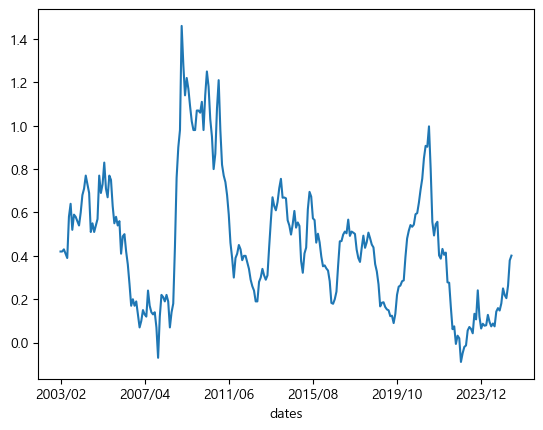

In [98]:
temp['10-3'].plot()

c:\Users\tmdal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


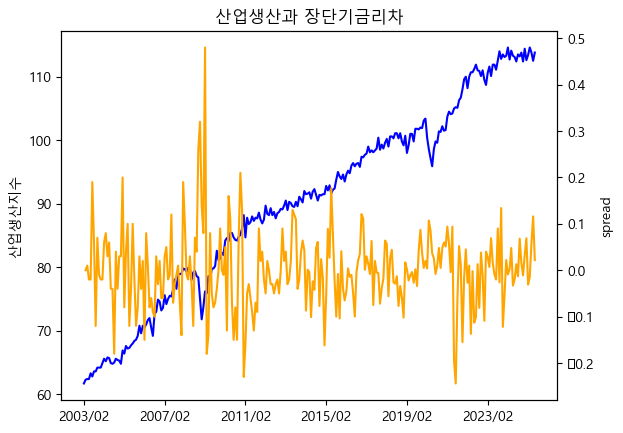

In [19]:
plt.rcParams['font.family'] = 'Malgun Gothic'
x = temp.index
y1 = temp['ipi']
y2 = temp['10-3'].diff()

fig, ax1 = plt.subplots()                # 첫 번째 y축
ax1.plot(x, y1, color='blue', label='y1')
ax1.set_ylabel('산업생산지수', color='black')

ax2 = ax1.twinx()                        # 두 번째 y축, x축은 공유
ax2.plot(x, y2, color='orange', label='y2')
ax2.set_ylabel('spread', color='black')
plt.xticks(x[::48])
plt.title('산업생산과 장단기금리차')
plt.show()

In [90]:
spreads = ['10-3', '3-91d', '10-91d']
results = []
for a in spreads:
    x = temp[a]
    y = np.log(temp['ipi'])
    reg = sm.OLS(y, x, missing='drop').fit()
    results.append(reg)
    

In [92]:
print(results[1].summary())

                                 OLS Regression Results                                
Dep. Variable:                    ipi   R-squared (uncentered):                   0.171
Model:                            OLS   Adj. R-squared (uncentered):              0.168
Method:                 Least Squares   F-statistic:                              55.16
Date:                Tue, 19 Aug 2025   Prob (F-statistic):                    1.49e-12
Time:                        21:35:26   Log-Likelihood:                         -760.69
No. Observations:                 269   AIC:                                      1523.
Df Residuals:                     268   BIC:                                      1527.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
spreads = ['10-3', '3-91d', '10-91d']
results = []
for a in spreads:
    x = sm.add_constant(temp[a])
    y = temp['ipi'].pct_change()
    reg = sm.OLS(y, x, missing='drop').fit()
    results.append(reg)
    

In [23]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2,cd91,3y,10y,10-3,3-91d,10-91d
dates,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN,4.54,4.730,5.150,0.420,0.190,0.610
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6,4.76,4.780,5.200,0.420,0.020,0.440
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1,4.62,4.600,5.030,0.430,-0.020,0.410
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0,4.39,4.270,4.680,0.410,-0.120,0.290
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9,4.28,4.070,4.460,0.390,-0.210,0.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,87.1,0.8,2.95,2.611,2.830,0.219,-0.339,-0.120
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,90.5,1.2,2.84,2.590,2.795,0.205,-0.250,-0.045
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,86.7,-0.8,2.74,2.395,2.658,0.263,-0.345,-0.082


In [82]:
temp.columns

Index(['ipi', '전산업', '제조업', '대기업', '중소기업', '중화학공업', '경공업', '수출기업', '내수기업',
       '비제조업', '서비스업', 'ipi_2', 'cd91', '3y', '10y', '10-3', '3-91d', '10-91d',
       'ipi_cycle', 'ipi_trend', 'ipi_bk', 'test', 'cpi', 'winsor', 'ipi_z',
       '10-3_z', '10-91d_z', '3-91d_z', 'call', '10-c', '3-c', 'ipi_z_bk',
       '10-3_z_bk', '10-91d_z_bk', '3-91d_z_bk', '10-3_bk', '3-91d_bk',
       '10-91d_bk', 'ipi_z_bk_z', '10-3_z_bk_z', '10-91d_z_bk_z',
       '3-91d_z_bk_z', 'ipi_bk_z', '10-3_bk_z', '3-91d_bk_z', '10-91d_bk_z'],
      dtype='object')

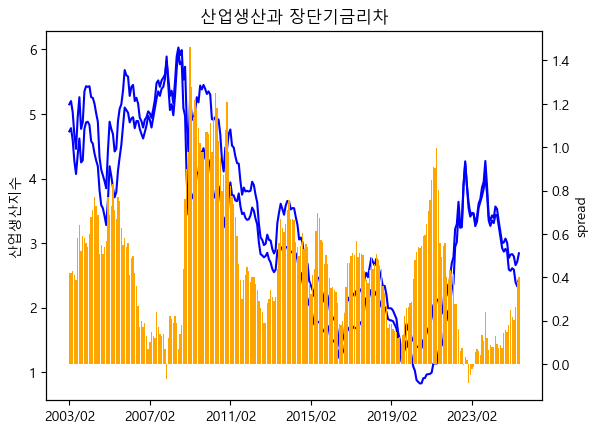

In [87]:


plt.rcParams['font.family'] = 'Malgun Gothic'
x = temp.index
y1 = temp[['3y', '10y']]
y2 = temp['10-3']

fig, ax1 = plt.subplots()                # 첫 번째 y축
ax1.plot(x, y1, color='blue', label='y1')
ax1.set_ylabel('산업생산지수', color='black')

ax2 = ax1.twinx()                        # 두 번째 y축, x축은 공유
ax2.bar(x, y2, color='orange', label='y2')
ax2.set_ylabel('spread', color='black')
plt.xticks(x[::48])
plt.title('산업생산과 장단기금리차')
plt.show()

In [24]:
temp['ipi_cycle'], temp['ipi_trend'] = sm.tsa.filters.cffilter(
    np.log(temp['ipi']),
    low=18,
    high=96,
    drift=True
)

In [25]:
x = sm.add_constant(temp['3-91d'].diff())
y = temp['ipi_cycle']
reg = sm.OLS(y, x, missing='drop').fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              ipi_cycle   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     9.920
Date:                Tue, 19 Aug 2025   Prob (F-statistic):            0.00182
Time:                        16:36:17   Log-Likelihood:                 741.41
No. Observations:                 268   AIC:                            -1479.
Df Residuals:                     266   BIC:                            -1472.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.278      0.7

In [26]:
for i in np.arange(0,13,3):
    x = sm.add_constant(temp['10-3'].diff()).shift(i)
    y = temp['ipi_cycle']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')

lag: 0 
 r-square: 0.04996747969959936 
 rmse: 0.015161958058359005
lag: 3 
 r-square: 0.07116674153963887 
 rmse: 0.01507633238533514
lag: 6 
 r-square: 0.05588787365001735 
 rmse: 0.01528009192581072
lag: 9 
 r-square: 0.022991937982074218 
 rmse: 0.01561579135235253
lag: 12 
 r-square: 0.004032492733269555 
 rmse: 0.01584605893525988


In [27]:
temp['ipi_cycle'], temp['ipi_trend'] = sm.tsa.filters.cffilter(
    np.log(temp['ipi']), low=18, high=96, drift=True
    )

In [28]:
#전산업생산지수 월간 자료에 bk 필터 적용
temp['ipi_bk'] = sm.tsa.filters.bkfilter(
    np.log(temp['ipi']),
    low=18,
    high=96,
    K=12  # K is the lead/lag length of the filter, 12 is common for monthly data
)

In [29]:
for i in np.arange(0,13,3):
    x = sm.add_constant(temp['10-3']).shift(i)
    y = temp['ipi_cycle']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')

lag: 0 
 r-square: 0.1827459470473568 
 rmse: 0.014037621135067296
lag: 3 
 r-square: 0.049275457441164794 
 rmse: 0.015224187115630257
lag: 6 
 r-square: 8.798120798569897e-08 
 rmse: 0.015699731566162858
lag: 9 
 r-square: 0.03191284683282647 
 rmse: 0.015520791601442818
lag: 12 
 r-square: 0.08044166547805542 
 rmse: 0.015198857608108622


In [30]:
temp['test'] = (temp['10-3']**2)

for i in np.arange(0,13,3):
    x = sm.add_constant(temp['test']).shift(i)
    y = temp['ipi_cycle']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')


lag: 0 
 r-square: 0.1572615016108012 
 rmse: 0.01425480866757014
lag: 3 
 r-square: 0.03790443545889122 
 rmse: 0.015314959995900705
lag: 6 
 r-square: 0.0006866862552654673 
 rmse: 0.015694340935932104
lag: 9 
 r-square: 0.0394106487378183 
 rmse: 0.015460570772559702
lag: 12 
 r-square: 0.08158071969144676 
 rmse: 0.015189441301034345


In [31]:
cpi = pd.read_csv(dir+'/data/cpi.csv')

In [32]:
cpi.columns

Index(['통계표', '계정항목', '단위', '가중치', '변환', '2003/01', '2003/02', '2003/03',
       '2003/04', '2003/05',
       ...
       '2024/10', '2024/11', '2024/12', '2025/01', '2025/02', '2025/03',
       '2025/04', '2025/05', '2025/06', '2025/07'],
      dtype='object', length=276)

In [33]:
drops = ['통계표', '계정항목', '단위', '가중치', '변환']
cpi.drop(columns=drops, inplace=True)
cpi = cpi.T
cpi.columns = ['cpi']

In [34]:
temp = temp.join(cpi, how='left')

In [35]:
np.corrcoef(temp['ipi_cycle'], temp['3-91d'])

array([[1.        , 0.01919682],
       [0.01919682, 1.        ]])

In [36]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,...,3y,10y,10-3,3-91d,10-91d,ipi_cycle,ipi_trend,ipi_bk,test,cpi
dates,,,,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,...,4.730,5.150,0.420,0.190,0.610,-0.003329,4.125613,NaN,0.176400,69.213
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,...,4.780,5.200,0.420,0.020,0.440,-0.001950,4.131627,NaN,0.176400,70.034
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,...,4.600,5.030,0.430,-0.020,0.410,-0.000343,4.129340,NaN,0.184900,69.908
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,...,4.270,4.680,0.410,-0.120,0.290,0.001379,4.125334,NaN,0.168100,69.782
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,...,4.070,4.460,0.390,-0.210,0.180,0.003092,4.135656,NaN,0.152100,69.592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,...,2.611,2.830,0.219,-0.339,-0.120,-0.011771,4.139671,NaN,0.047961,116.080
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,...,2.590,2.795,0.205,-0.250,-0.045,-0.012566,4.148708,NaN,0.042025,116.290
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,...,2.395,2.658,0.263,-0.345,-0.082,-0.013005,4.139857,NaN,0.069169,116.380


In [37]:
#2년 롤링 z-score?
rolling_mean = temp['10-3'].rolling(window=24).mean()
rolling_std = temp['10-3'].rolling(window=24).std()
temp['test'] = (temp['10-3'] - rolling_mean) / rolling_std


In [38]:
for i in np.arange(0,7,1):
    x = sm.add_constant(temp['test']).shift(i)
    y = temp['ipi_cycle']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')


lag: 0 
 r-square: 0.33888420348409465 
 rmse: 0.013097978663066558
lag: 1 
 r-square: 0.33246988835340674 
 rmse: 0.01316620689856899
lag: 2 
 r-square: 0.31133373228351136 
 rmse: 0.013377385573071226
lag: 3 
 r-square: 0.2764199983385285 
 rmse: 0.013717493421376903
lag: 4 
 r-square: 0.23250286987234603 
 rmse: 0.01413500479721457
lag: 5 
 r-square: 0.18385193524894827 
 rmse: 0.014586830871666541
lag: 6 
 r-square: 0.13515058491348364 
 rmse: 0.015030703397218887


In [39]:
x = sm.add_constant(temp['test'])
y = temp['ipi_cycle']
reg = sm.OLS(y, x, missing='drop').fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              ipi_cycle   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     125.1
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           1.03e-23
Time:                        16:36:17   Log-Likelihood:                 718.43
No. Observations:                 246   AIC:                            -1433.
Df Residuals:                     244   BIC:                            -1426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.589      0.5

In [40]:
from scipy.stats.mstats import winsorize

In [41]:
for i in np.arange(0,7,1):
    temp['winsor']  = winsorize(temp['test'], limits=[0.05, 0.05])
    x = sm.add_constant(temp['winsor']).shift(i)
    y = temp['ipi_cycle']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')


lag: 0 
 r-square: 0.34624550762750594 
 rmse: 0.013024853723388642
lag: 1 
 r-square: 0.33978498224481124 
 rmse: 0.013093867575368316
lag: 2 
 r-square: 0.3183028154937414 
 rmse: 0.013309526017368805
lag: 3 
 r-square: 0.28266531546372675 
 rmse: 0.013658166355929624
lag: 4 
 r-square: 0.23783350261196667 
 rmse: 0.014085832099660937
lag: 5 
 r-square: 0.18821794205403108 
 rmse: 0.01454776222287278
lag: 6 
 r-square: 0.13859168035725433 
 rmse: 0.01500077122918672


In [42]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,...,10y,10-3,3-91d,10-91d,ipi_cycle,ipi_trend,ipi_bk,test,cpi,winsor
dates,,,,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,...,5.150,0.420,0.190,0.610,-0.003329,4.125613,NaN,NaN,69.213,NaN
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,...,5.200,0.420,0.020,0.440,-0.001950,4.131627,NaN,NaN,70.034,NaN
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,...,5.030,0.430,-0.020,0.410,-0.000343,4.129340,NaN,NaN,69.908,NaN
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,...,4.680,0.410,-0.120,0.290,0.001379,4.125334,NaN,NaN,69.782,NaN
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,...,4.460,0.390,-0.210,0.180,0.003092,4.135656,NaN,NaN,69.592,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,...,2.830,0.219,-0.339,-0.120,-0.011771,4.139671,NaN,1.677632,116.080,1.677632
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,...,2.795,0.205,-0.250,-0.045,-0.012566,4.148708,NaN,1.383831,116.290,1.383831
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,...,2.658,0.263,-0.345,-0.082,-0.013005,4.139857,NaN,2.036400,116.380,2.036400


In [43]:
mu = temp['ipi'].mean()
std = temp['ipi'].std()
temp['ipi_z'] = (temp['ipi'] - mu) / std

In [44]:
spd = ['10-3', '10-91d', '3-91d']
for a in spd:
    mu = temp[a].mean()
    std = temp[a].std()
    temp[a+'_z'] = (temp[a] - mu)/std

In [45]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,...,ipi_cycle,ipi_trend,ipi_bk,test,cpi,winsor,ipi_z,10-3_z,10-91d_z,3-91d_z
dates,,,,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,...,-0.003329,4.125613,NaN,NaN,69.213,NaN,-1.918017,-0.118772,-0.105637,-0.083365
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,...,-0.001950,4.131627,NaN,NaN,70.034,NaN,-1.877867,-0.118772,-0.338905,-0.424110
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,...,-0.000343,4.129340,NaN,NaN,69.908,NaN,-1.871175,-0.085215,-0.380070,-0.504286
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,...,0.001379,4.125334,NaN,NaN,69.782,NaN,-1.871175,-0.152329,-0.544730,-0.704724
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,...,0.003092,4.135656,NaN,NaN,69.592,NaN,-1.810950,-0.219443,-0.695669,-0.885119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,...,-0.011771,4.139671,NaN,1.677632,116.080,1.677632,1.541568,-0.793267,-1.107319,-1.143685
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,...,-0.012566,4.148708,NaN,1.383831,116.290,1.383831,1.621868,-0.840247,-1.004407,-0.965294
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,...,-0.013005,4.139857,NaN,2.036400,116.380,2.036400,1.568334,-0.645616,-1.055177,-1.155711


In [47]:
temp[['ipi_z', '10-91d_z', '10-3_z', '3-91d_z']].corr()

,ipi_z,10-91d_z,10-3_z,3-91d_z
ipi_z,1.000000,-0.323174,-0.377000,-0.246889
10-91d_z,-0.323174,1.000000,0.854169,0.950541
10-3_z,-0.377000,0.854169,1.000000,0.650413
3-91d_z,-0.246889,0.950541,0.650413,1.000000


In [52]:
for a in spd:
    rolling_mean = temp[a].rolling(window=24).mean()
    rolling_std = temp[a].rolling(window=24).std()
    temp['test'] = (temp[a] - rolling_mean) / rolling_std
    x = sm.add_constant(temp['test'])
    y = temp['ipi_cycle']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {a} \n r-square: {reg.rsquared} \n rmse: {rmse} \n coeff: {reg.params[1]}')


lag: 10-3 
 r-square: 0.33888420348409465 
 rmse: 0.013097978663066558 
 coeff: -0.006776743471836143
lag: 10-91d 
 r-square: 0.14492557643364878 
 rmse: 0.014895924748467688 
 coeff: -0.004471625419951428
lag: 3-91d 
 r-square: 0.03416381234404642 
 rmse: 0.015831324403094007 
 coeff: -0.0022233910433090733


C:\Users\tmdal\AppData\Local\Temp\ipykernel_26072\290717582.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'lag: {a} \n r-square: {reg.rsquared} \n rmse: {rmse} \n coeff: {reg.params[1]}')
C:\Users\tmdal\AppData\Local\Temp\ipykernel_26072\290717582.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'lag: {a} \n r-square: {reg.rsquared} \n rmse: {rmse} \n coeff: {reg.params[1]}')
C:\Users\tmdal\AppData\Local\Temp\ipykernel_26072\290717582.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent w

In [53]:
call = pd.read_csv(dir+'/data/call.csv')

In [55]:
call.columns

Index(['통계표', '계정항목', '단위', '변환', '2003/01', '2003/02', '2003/03', '2003/04',
       '2003/05', '2003/06',
       ...
       '2024/10', '2024/11', '2024/12', '2025/01', '2025/02', '2025/03',
       '2025/04', '2025/05', '2025/06', '2025/07'],
      dtype='object', length=275)

In [56]:
drops = ['통계표', '계정항목', '단위', '변환']
call.drop(columns=drops, inplace=True)
call = call.T
call.columns = ['call']

In [60]:
temp = temp.join(call, how='left',)

In [61]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,...,ipi_trend,ipi_bk,test,cpi,winsor,ipi_z,10-3_z,10-91d_z,3-91d_z,call
dates,,,,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,...,4.125613,NaN,NaN,69.213,NaN,-1.918017,-0.118772,-0.105637,-0.083365,4.300
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,...,4.131627,NaN,NaN,70.034,NaN,-1.877867,-0.118772,-0.338905,-0.424110,4.240
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,...,4.129340,NaN,NaN,69.908,NaN,-1.871175,-0.085215,-0.380070,-0.504286,4.240
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,...,4.125334,NaN,NaN,69.782,NaN,-1.871175,-0.152329,-0.544730,-0.704724,4.070
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,...,4.135656,NaN,NaN,69.592,NaN,-1.810950,-0.219443,-0.695669,-0.885119,4.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,...,4.139671,NaN,-0.135208,116.080,1.677632,1.541568,-0.793267,-1.107319,-1.143685,2.965
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,...,4.148708,NaN,0.253165,116.290,1.383831,1.621868,-0.840247,-1.004407,-0.965294,2.754
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,...,4.139857,NaN,-0.125240,116.380,2.036400,1.568334,-0.645616,-1.055177,-1.155711,2.769


In [62]:
temp['10-c'] = temp['10y'] - temp['call']
temp['3-c'] = temp['3y'] - temp['call']

In [63]:
calls = ['10-c', '3-c']
for a in calls:
    rolling_mean = temp[a].rolling(window=24).mean()
    rolling_std = temp[a].rolling(window=24).std()
    temp['test'] = (temp[a] - rolling_mean) / rolling_std
    x = sm.add_constant(temp['test'])
    y = temp['ipi_cycle']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {a} \n r-square: {reg.rsquared} \n rmse: {rmse} \n coeff: {reg.params[1]}')


lag: 10-c 
 r-square: 0.16155268341009466 
 rmse: 0.014750386531574611 
 coeff: -0.004765640977663491
lag: 3-c 
 r-square: 0.05713539130098244 
 rmse: 0.01564192426228778 
 coeff: -0.0029240650583912254


C:\Users\tmdal\AppData\Local\Temp\ipykernel_26072\360509212.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'lag: {a} \n r-square: {reg.rsquared} \n rmse: {rmse} \n coeff: {reg.params[1]}')
C:\Users\tmdal\AppData\Local\Temp\ipykernel_26072\360509212.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'lag: {a} \n r-square: {reg.rsquared} \n rmse: {rmse} \n coeff: {reg.params[1]}')


In [65]:
calls = ['10-c', '3-c']
for a in calls:
    ax = sm.add_constant(temp[a])
    y = temp['ipi_cycle']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {a} \n r-square: {reg.rsquared} \n rmse: {rmse} \n coeff: {reg.params[1]}')


lag: 10-c 
 r-square: 0.05713539130098244 
 rmse: 0.01564192426228778 
 coeff: -0.0029240650583912254
lag: 3-c 
 r-square: 0.05713539130098244 
 rmse: 0.01564192426228778 
 coeff: -0.0029240650583912254


C:\Users\tmdal\AppData\Local\Temp\ipykernel_26072\1263911033.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'lag: {a} \n r-square: {reg.rsquared} \n rmse: {rmse} \n coeff: {reg.params[1]}')
C:\Users\tmdal\AppData\Local\Temp\ipykernel_26072\1263911033.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'lag: {a} \n r-square: {reg.rsquared} \n rmse: {rmse} \n coeff: {reg.params[1]}')


In [66]:
def best_lag(a, b, max_lag=12):
    best = (0, a.corr(b))
    for lag in range(-max_lag, max_lag+1):
        if lag == 0:
            continue
        corr = a.corr(b.shift(lag))
        if pd.notna(corr) and corr > best[1]:
            best = (lag, corr)
    return best

In [68]:
l = ['10-3_z', '10-91d_z', '3-91d_z']
for a in l:
    lag, lag_corr = best_lag(temp['ipi_z'], temp[a], max_lag=12)
    print(f"최고 교차상관: lag={lag}개월, corr={round(float(lag_corr),3)}")
    if lag > 0:
        print(f"해석: {a}가 약", lag, "개월 선행.")
    elif lag < 0:
        print("해석: 전산업생산지수가 약", abs(lag), "개월 선행.")
    else:
        print("해석: 유의미한 선행·후행이 크지 않음.")

최고 교차상관: lag=12개월, corr=-0.278
해석: 10-3_z가 약 12 개월 선행.
최고 교차상관: lag=12개월, corr=-0.207
해석: 10-91d_z가 약 12 개월 선행.
최고 교차상관: lag=12개월, corr=-0.134
해석: 3-91d_z가 약 12 개월 선행.


In [71]:
temp[ll]

,ipi_z,10-3_z,10-91d_z,3-91d_z
dates,,,,
2003/02,-1.918017,-0.118772,-0.105637,-0.083365
2003/03,-1.877867,-0.118772,-0.338905,-0.424110
2003/04,-1.871175,-0.085215,-0.380070,-0.504286
2003/05,-1.871175,-0.152329,-0.544730,-0.704724
2003/06,-1.810950,-0.219443,-0.695669,-0.885119
...,...,...,...,...
2025/02,1.541568,-0.793267,-1.107319,-1.143685
2025/03,1.621868,-0.840247,-1.004407,-0.965294
2025/04,1.568334,-0.645616,-1.055177,-1.155711


In [70]:
ll = ['ipi_z','10-3_z', '10-91d_z', '3-91d_z']
ll2 = []
for a in ll:
    temp[a + '_bk'] = sm.tsa.filters.bkfilter(
        np.log(temp[a]),
        low=18,
        high=96,
        K=12  # K is the lead/lag length of the filter, 12 is common for monthly data
    )
    ll2.append(a + '_bk')

c:\Users\tmdal\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tmdal\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tmdal\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tmdal\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [78]:
temp['10-3']

dates
2003/02    0.420
2003/03    0.420
2003/04    0.430
2003/05    0.410
2003/06    0.390
           ...  
2025/02    0.219
2025/03    0.205
2025/04    0.263
2025/05    0.379
2025/06    0.401
Name: 10-3, Length: 269, dtype: float64

In [79]:
temp['10-3_bk'] = sm.tsa.filters.bkfilter(
        np.log(temp['10-3']),
        low=18,
        high=96,
        K=12  # K is the lead/lag length of the filter, 12 is common for monthly data
    )

c:\Users\tmdal\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [81]:
temp['10-3_bk'].head(40)

dates
2003/02   NaN
2003/03   NaN
2003/04   NaN
2003/05   NaN
2003/06   NaN
2003/07   NaN
2003/08   NaN
2003/09   NaN
2003/10   NaN
2003/11   NaN
2003/12   NaN
2004/01   NaN
2004/02   NaN
2004/03   NaN
2004/04   NaN
2004/05   NaN
2004/06   NaN
2004/07   NaN
2004/08   NaN
2004/09   NaN
2004/10   NaN
2004/11   NaN
2004/12   NaN
2005/01   NaN
2005/02   NaN
2005/03   NaN
2005/04   NaN
2005/05   NaN
2005/06   NaN
2005/07   NaN
2005/08   NaN
2005/09   NaN
2005/10   NaN
2005/11   NaN
2005/12   NaN
2006/01   NaN
2006/02   NaN
2006/03   NaN
2006/04   NaN
2006/05   NaN
Name: 10-3_bk, dtype: float64

In [72]:
spreads = ['ipi','10-3', '3-91d', '10-91d']
for a in spreads:
    temp[a + '_bk'] = sm.tsa.filters.bkfilter(
        np.log(temp[a]),
        low=18,
        high=96,
        K=12  # K is the lead/lag length of the filter, 12 is common for monthly data
    )
    ll2.append(a + '_bk')

c:\Users\tmdal\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tmdal\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tmdal\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tmdal\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tmdal\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [73]:
ll2

['ipi_z_bk',
 '10-3_z_bk',
 '10-91d_z_bk',
 '3-91d_z_bk',
 'ipi_bk',
 '10-3_bk',
 '3-91d_bk',
 '10-91d_bk']

In [74]:
for a in ll2:

    mu = temp[a].mean()
    std = temp[a].std()

    temp[a + '_z'] = (temp[a]-mu)/std

In [77]:
temp['10-3_bk'].head(40)

dates
2003/02   NaN
2003/03   NaN
2003/04   NaN
2003/05   NaN
2003/06   NaN
2003/07   NaN
2003/08   NaN
2003/09   NaN
2003/10   NaN
2003/11   NaN
2003/12   NaN
2004/01   NaN
2004/02   NaN
2004/03   NaN
2004/04   NaN
2004/05   NaN
2004/06   NaN
2004/07   NaN
2004/08   NaN
2004/09   NaN
2004/10   NaN
2004/11   NaN
2004/12   NaN
2005/01   NaN
2005/02   NaN
2005/03   NaN
2005/04   NaN
2005/05   NaN
2005/06   NaN
2005/07   NaN
2005/08   NaN
2005/09   NaN
2005/10   NaN
2005/11   NaN
2005/12   NaN
2006/01   NaN
2006/02   NaN
2006/03   NaN
2006/04   NaN
2006/05   NaN
Name: 10-3_bk, dtype: float64